<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, 'r') as file:
    conteudo = file.read()

fonte = BeautifulSoup(conteudo, 'lxml-xml')

In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [3]:
import csv

def extrair_textos(item):
    return item.text

estado = map(extrair_textos, fonte.find_all('NOME'))
sigla = map(extrair_textos, fonte.find_all('SIGLA'))
regiao = map(extrair_textos, fonte.find_all('REGIAO'))

conteudo = list(zip(estado, sigla, regiao))


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, mode='w') as arquivo:
    writer = csv.writer(arquivo, delimiter=';')
    writer.writerow(['estado', 'sigla', 'regiao'])
    writer.writerows(conteudo)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [7]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE , sep=',')

In [8]:
# visualize os resultados

fonte

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [27]:
# manipule os dados

censo_2010 = fonte.query('Censo == 2010')
df_filtrado = censo_2010[["UF", "nome", "Pop_est_2009", "PIB", "PIB_percapita"]]
df_filtrado = df_filtrado.rename(columns={'UF': 'estado', "nome" : "cidade", "Pop_est_2009" : "populacao", "PIB" : "pib", "PIB_percapita" : "pib_percapita"})
df_filtrado

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [28]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

df_filtrado.to_csv(path_or_buf=NOME_ARQUIVO_DESTINO , sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [35]:
import unidecode

estados = pd.read_csv('estados-limpo.csv', sep=';')
cidades = pd.read_csv('cidades-limpo.csv', sep=';')


cidades['estado'] = cidades['estado'].apply(lambda estado: unidecode.unidecode(estado))

brasil = pd.merge(left=estados, right=cidades, on='estado', how='outer')

brasil.to_csv(path_or_buf='brasil.csv', sep=';')

brasil

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,14275,1.091819e+05,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,19697,2.171539e+05,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,5662,4.834730e+04,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,14224,1.296411e+05,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,7505,6.147873e+04,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,3015,1.600776e+04,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,12504,4.681494e+05,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,23627,2.886858e+05,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,128572,1.335420e+06,10386.549805


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [37]:
brasil_df = pd.read_csv('brasil.csv', sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [54]:
brasil_por_populacao = brasil_df.sort_values(by=['populacao'], ascending=False).reset_index(drop=True)
brasil_por_populacao.head(n=10)

,Unnamed: 0,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
1,2747,RIO DE JANEIRO,RJ,SUDESTE,Rio de Janeiro,6186710,175739344.0,28405.949219
2,246,BAHIA,BA,NORDESTE,Salvador,2998056,32824228.0,10948.500000
3,802,DISTRITO FEDERAL,DF,CENTRO-OESTE,Brasília,2606885,131487264.0,50438.460938
4,766,CEARA,CE,NORDESTE,Fortaleza,2505552,31789186.0,12687.500000
5,5447,MINAS GERAIS,MG,SUDESTE,Belo Horizonte,2452617,44595204.0,18182.699219
6,2056,PARANA,PR,SUL,Curitiba,1851215,45762420.0,24720.210938
7,142,AMAZONAS,AM,NORTE,Manaus,1738641,40486108.0,23286.060547
8,2446,PERNAMBUCO,PE,NORDESTE,Recife,1561659,24835340.0,15903.179688
9,1687,PARA,PA,NORTE,Belém,1437600,16526989.0,11496.240234


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [52]:
brasil_por_pib_percapita = brasil_df.sort_values(by=['pib_percapita'], ascending=False).reset_index(drop=True)
brasil_por_pib_percapita.query('regiao == "NORDESTE"').tail(n=5)

,Unnamed: 0,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
5544,1235,MARANHAO,MA,NORDESTE,Axixá,15203,36745.226562,2416.969971
5546,1338,MARANHAO,MA,NORDESTE,Timbiras,26909,63724.851562,2368.159912
5547,2512,PIAUI,PI,NORDESTE,Dom Inocêncio,10795,25457.230469,2358.239990
5550,1214,MARANHAO,MA,NORDESTE,Cajapió,10337,22781.035156,2203.830078
5554,1319,MARANHAO,MA,NORDESTE,São Vicente Ferrer,20463,39492.960938,1929.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [59]:
brasil_por_pib = brasil_df.sort_values(by=['pib'], ascending=False).reset_index(drop=True)
brasil_por_pib.query('estado == "SAO PAULO"').head(n=15)

,Unnamed: 0,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,4403,SAO PAULO,SP,SUDESTE,São Paulo,11037593,389317152.0,35271.929688
8,4355,SAO PAULO,SP,SUDESTE,Guarulhos,1299283,32473828.0,24993.650391
10,4472,SAO PAULO,SP,SUDESTE,Campinas,1064669,31654720.0,29731.980469
11,4238,SAO PAULO,SP,SUDESTE,Osasco,718646,31616452.0,43994.468750
12,3942,SAO PAULO,SP,SUDESTE,São Bernardo do Campo,810979,28935768.0,35680.050781
13,4476,SAO PAULO,SP,SUDESTE,Barueri,270173,26908070.0,99595.703125
17,3900,SAO PAULO,SP,SUDESTE,Santos,417098,22546134.0,54054.761719
18,4126,SAO PAULO,SP,SUDESTE,São José dos Campos,615871,22018042.0,35751.058594
22,4146,SAO PAULO,SP,SUDESTE,Jundiaí,349929,16585137.0,47395.718750
28,3948,SAO PAULO,SP,SUDESTE,Santo André,673396,14709603.0,21843.910156


 - Qual é o PIB do estado de Santa Catarina?

In [58]:
brasil_por_pib.query('estado == "SANTA CATARINA"')["pib"].sum()

1083413730.5107422

 - Qual é o população da região sul?

In [60]:
brasil_df.query('regiao == "SUL"')["populacao"].sum()

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [61]:
brasil_df.query('estado == "MATO GROSSO DO SUL"')["pib_percapita"].mean()

14458.896859975644

 - Qual é a população do Brasil?

In [62]:
brasil_df['populacao'].sum()

191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: ylabel='cidade'>

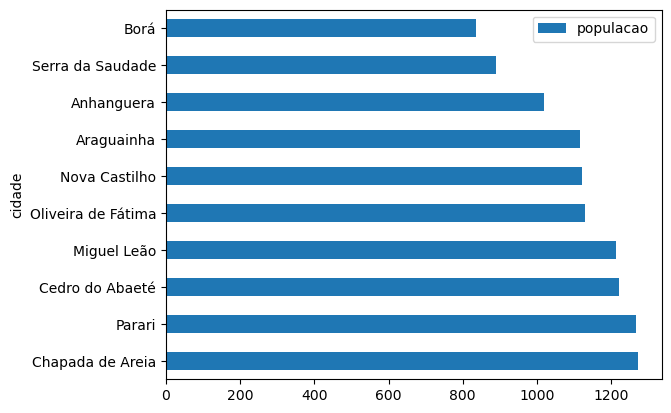

In [71]:
import matplotlib.pyplot as plt

brasil_por_populacao.tail(10).plot.barh(x='cidade', y='populacao', rot=0)

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

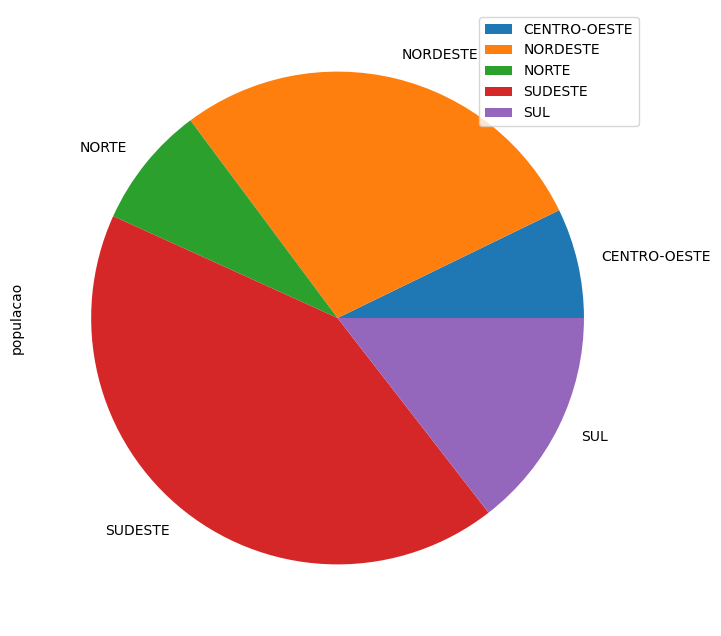

In [95]:
populacao = []
regioes = ['NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUL', 'SUDESTE']

for regiao in regioes:
    populacao.append(brasil_df.query(f'regiao == "{regiao}"')["populacao"].sum())

populacao_por_regiao = dict(regiao=regioes, populacao=populacao)

df_populacao_por_regiao = pd.DataFrame(populacao_por_regiao)
df_agrupado = df_populacao_por_regiao.groupby('regiao').agg('sum')
df_agrupado.plot.pie(y='populacao', figsize=(11, 8))